In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv",sep =',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [78]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Devide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [18]:
# Get the max tenure
print(df['tenure'].max()) #72

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

72


 Remove columns not required for processing

In [19]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

Plot distibution of individual predictors by churn

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

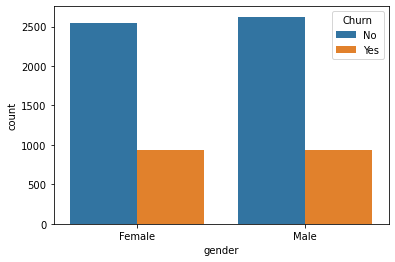

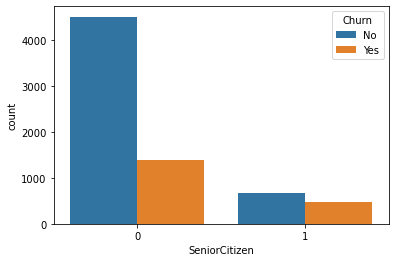

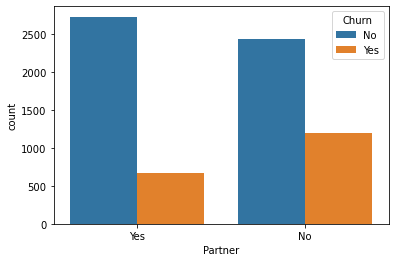

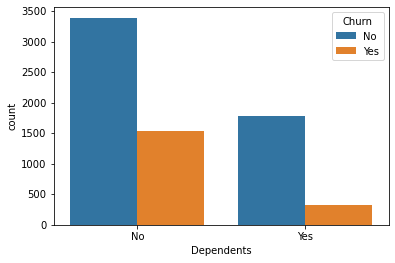

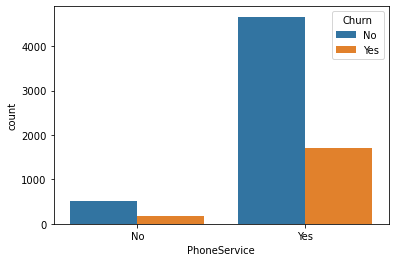

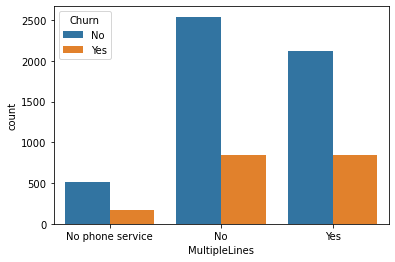

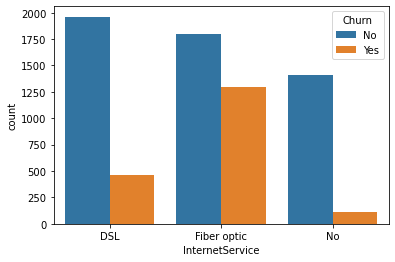

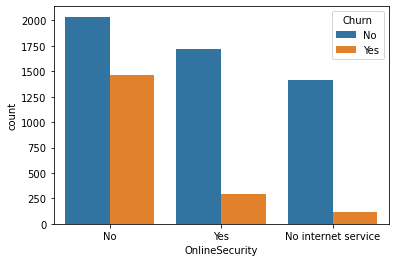

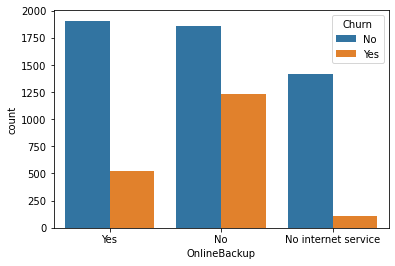

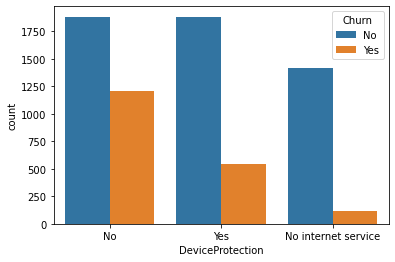

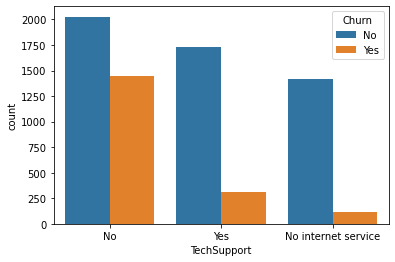

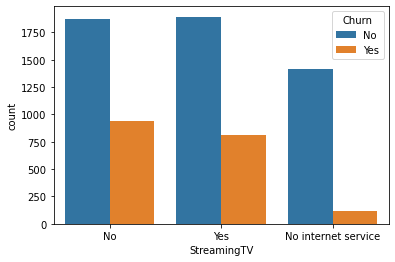

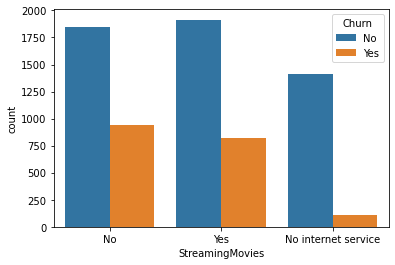

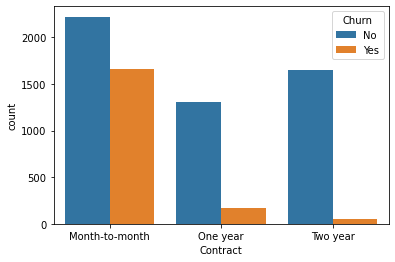

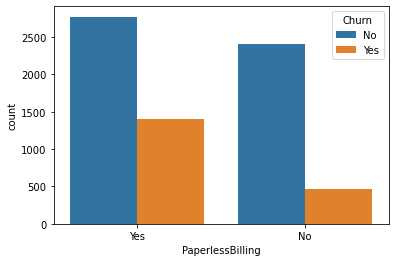

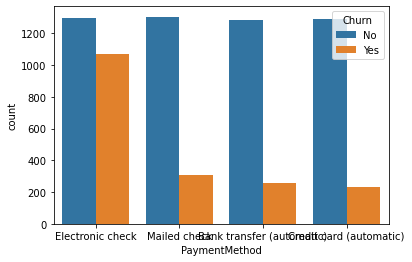

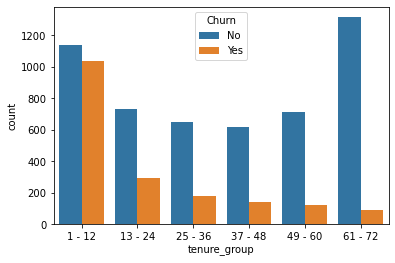

In [21]:
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']
for i, predictor in enumerate(df[col]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [22]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

 Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

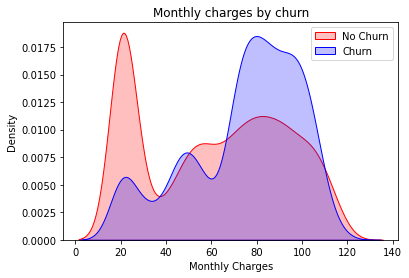

In [23]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

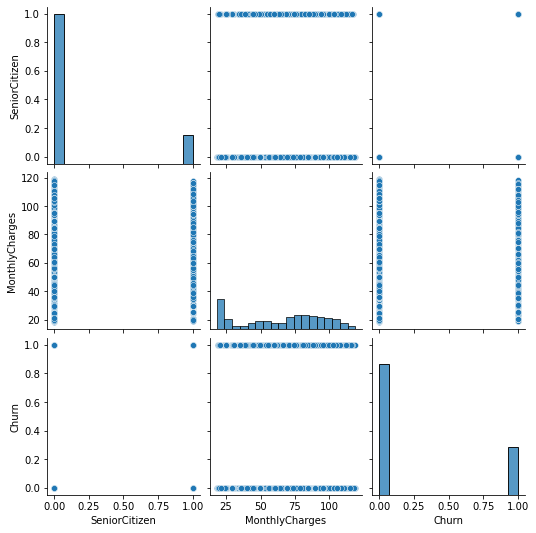

In [53]:
sns.pairplot(df)

In [55]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [24]:
from sklearn.preprocessing import LabelEncoder

cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService',
        'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
       'Contract','PaperlessBilling','PaymentMethod','tenure_group','TotalCharges']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1,0


<AxesSubplot:>

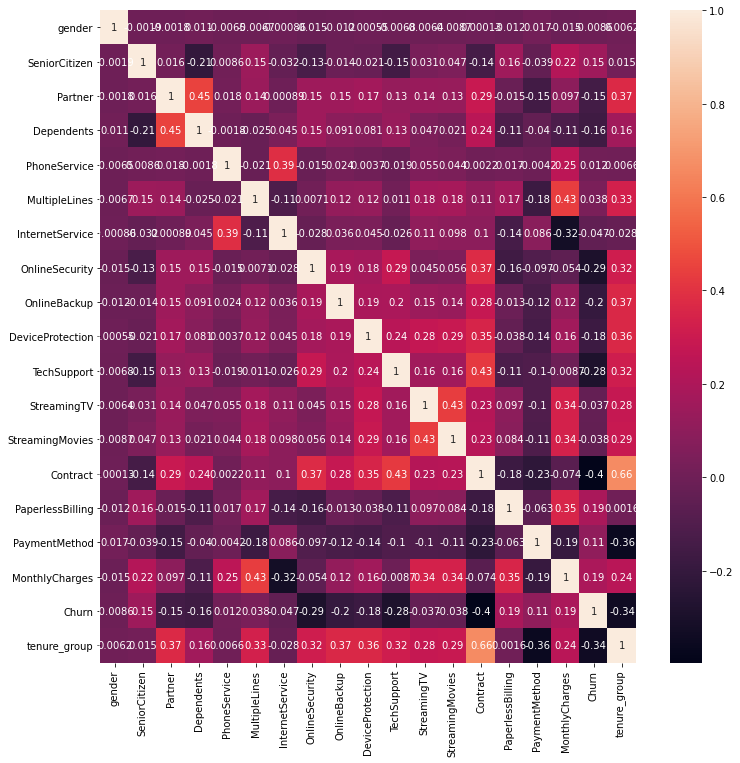

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)

## Plotting outliers

gender                 AxesSubplot(0.125,0.808774;0.133621x0.0712264)
SeniorCitizen       AxesSubplot(0.285345,0.808774;0.133621x0.0712264)
Partner              AxesSubplot(0.44569,0.808774;0.133621x0.0712264)
Dependents          AxesSubplot(0.606034,0.808774;0.133621x0.0712264)
PhoneService        AxesSubplot(0.766379,0.808774;0.133621x0.0712264)
MultipleLines          AxesSubplot(0.125,0.723302;0.133621x0.0712264)
InternetService     AxesSubplot(0.285345,0.723302;0.133621x0.0712264)
OnlineSecurity       AxesSubplot(0.44569,0.723302;0.133621x0.0712264)
OnlineBackup        AxesSubplot(0.606034,0.723302;0.133621x0.0712264)
DeviceProtection    AxesSubplot(0.766379,0.723302;0.133621x0.0712264)
TechSupport             AxesSubplot(0.125,0.63783;0.133621x0.0712264)
StreamingTV          AxesSubplot(0.285345,0.63783;0.133621x0.0712264)
StreamingMovies       AxesSubplot(0.44569,0.63783;0.133621x0.0712264)
Contract             AxesSubplot(0.606034,0.63783;0.133621x0.0712264)
PaperlessBilling    

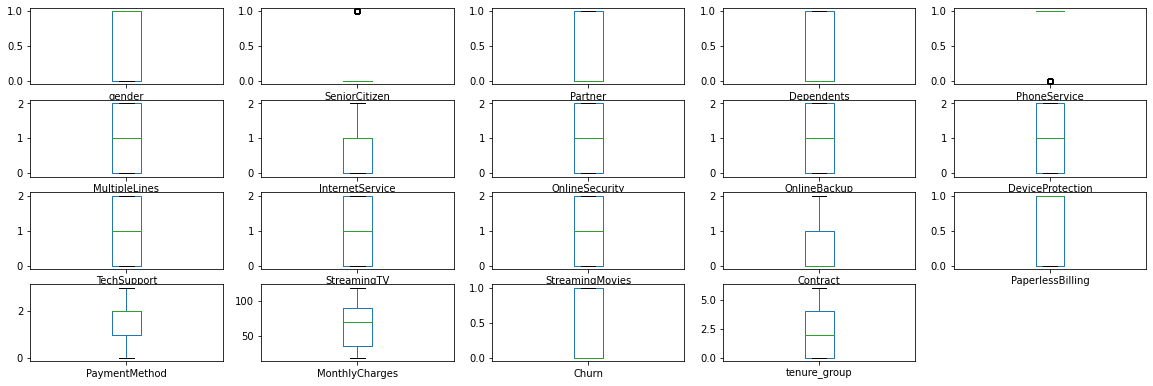

In [60]:
df.plot(kind = 'box',subplots = True,layout=(9,5),figsize = (20,15))

from the above graph we can see that there is not outliers presnt in the dataframe

## Check the distribution of skewness

In [61]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
tenure_group        0.250918
dtype: float64

we could see that there is no skewness on the data so we mode ahead with preprocessing part

## Preprocessing

In [25]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [26]:
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


### check out imbalanced data set

<AxesSubplot:xlabel='Churn', ylabel='count'>

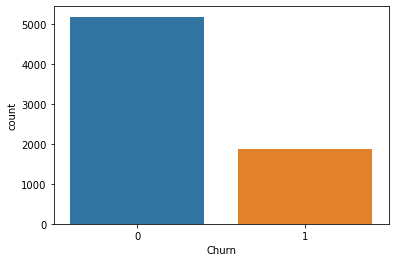

In [86]:
sns.countplot(y)

here is imbalace in the target variable so we try to balance it with smote technique

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sample,y_sample = sm.fit_resample(x,y)

In [28]:
print(x_sample.shape)
print(y_sample.shape)

(10348, 19)
(10348,)


here i reduced the imbalanced data with the smote technique

In [29]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_sample)

here i used standard scalar to scale the feature columns

In [30]:
from sklearn.model_selection import train_test_split
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_sample,test_size = .20,random_state = 42)

Because the target variable has catagories so we could use following models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [32]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

model = [lr,rfc,dt,nb]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i.score(x_train,y_train))
    print(i.score(x_test,y_test))
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

0.8061125875815415
0.8241545893719807
Accuracy score of LogisticRegression() is 0.8241545893719807
[[806 215]
 [149 900]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070

0.9981879681082387
0.8405797101449275
Accuracy score of RandomForestClassifier() is 0.8405797101449275
[[864 157]
 [173 876]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1021
           1       0.85      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

0.9981879681082387
0.797584541062802
Accuracy score of DecisionTreeClassifier() is 0.7975845410628

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [33]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =7)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.7936966088276696
cv score of RandomForestClassifier() is 0.7890095940176786
cv score of DecisionTreeClassifier() is 0.721709606173429
cv score of GaussianNB() is 0.7564949359030947


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like Logistic Regression model is giving the best score

## Hyperparameter Tuning

In [112]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(5,100,5)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}]
}

log_reg= LogisticRegression()
clf = GridSearchCV(estimator = log_reg,param_grid = param_grid,refit = True, verbose = 1, cv=5)
clf.fit(x_train,y_train)
clf.best_params_

Fitting 5 folds for each of 15960 candidates, totalling 79800 fits


{'C': 10,
 'class_weight': {0: 1, 1: 1},
 'max_iter': 10,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'sag'}

In [34]:
log_reg2= LogisticRegression(C = 10, max_iter = 10, penalty = 'l2', solver = 'sag',multi_class = 'ovr',
                             class_weight = {0: 1, 1: 1})
log_reg2.fit(x_train,y_train)
print(log_reg2.score(x_test,y_test))
print(log_reg2.score(x_train,y_train))

0.8231884057971014
0.8052669726987195


Now Here i used the required parameter in LogisticRegresson and tries to increase the accuracy

In [35]:
pred_final = log_reg2.predict(x_test)
print(accuracy_score(y_test,pred_final))

0.8231884057971014


and here is our final predicting accuracy

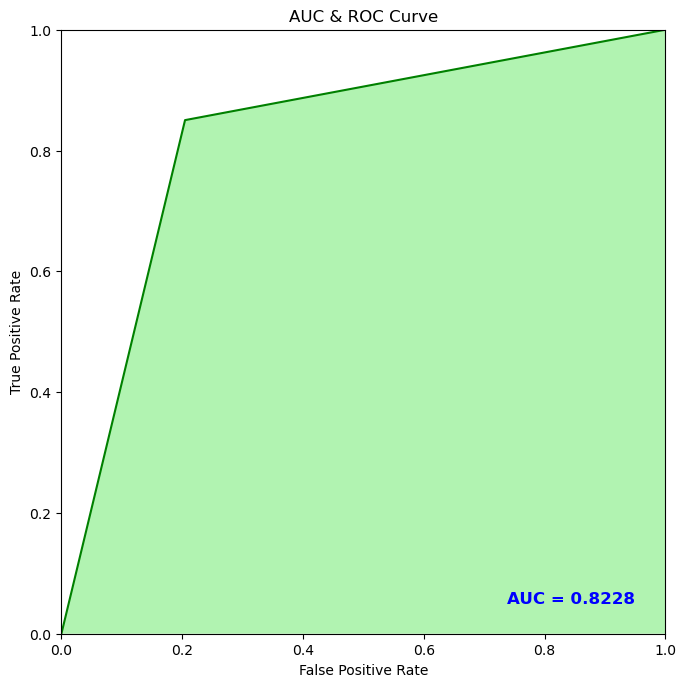

In [36]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_final)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_final)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

here i ploted the AUC & ROC CURVE

## Now we dump the final output

In [ ]:
import pickle
filename = 'customer_churn.pkl'
pickle.dump(log_reg2,open(filename,'wb'))